In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize import curve_fit

## user parameters
Ns = 30
Ni = 5
Sigma_0 = 15
C_0 = 5
Stimulus_intensity = np.array([5, 10, 15, 20, 25, 30])
Response = np.array([12, 11, 19, 27, 30, 30])
P_lapse = 3


## function definitions

def log_likelihood(ns, I, sigma, c, Mark, x_lapse):
    ps = norm.cdf((I - c) / sigma)
    if Mark == 'l':
        p_lapse = norm.cdf(x_lapse)
        ps = (1 - p_lapse - 1 / 3) * ps + 1 / 3
    if Mark == 'g':
        ps = (1 - 1 / 3) * ps + 1 / 3

    p1 = np.sum(np.log([i for i in range(1, Ns)]))
    p2 = np.sum(np.log([i for i in range(1, ns)]))
    p3 = np.sum(np.log([i for i in range(1, Ns - ns)]))
    p4 = ns * np.log(abs(ps)) + (Ns - ns) * np.log(1 - ps)
    return p1 - p2 - p3 + p4


def shell_log_likelihood_with_lap(param):
    main_loss = 0
    for i in range(Ni):
        main_loss += log_likelihood(Response[i], Stimulus_intensity[i], param[0], param[1], 'l', param[2])
    return -main_loss


def shell_log_likelihood_with_guess(param):
    main_loss = 0
    for i in range(Ni):
        main_loss += log_likelihood(Response[i], Stimulus_intensity[i], param[0], param[1], 'g', param[2])
    return -main_loss


def shell_log_likelihood(param):
    main_loss = 0
    for i in range(Ni):
        main_loss += log_likelihood(Response[i], Stimulus_intensity[i], param[0], param[1], False, param[2])
    return -main_loss

[ 8.48969177 10.11993131  3.        ] [ 3.78363051 15.69076733  3.        ] [ 3.78362932 15.69076439 -5.99958436]


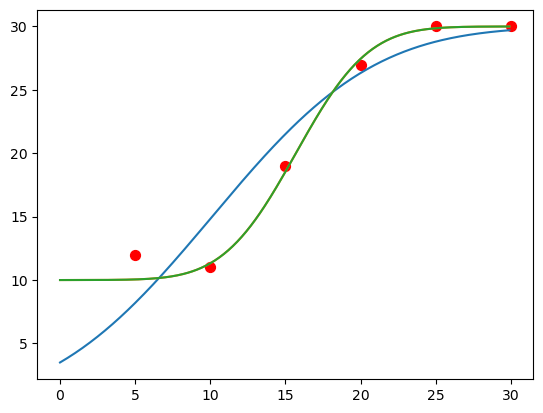

In [10]:
res1 = minimize(shell_log_likelihood, np.array([Sigma_0, C_0, P_lapse]))
res2 = minimize(shell_log_likelihood_with_guess, np.array([Sigma_0, C_0, P_lapse]))
res3 = minimize(shell_log_likelihood_with_lap, np.array([Sigma_0, C_0, P_lapse]))

fig, ax = plt.subplots()
# print(res3.x[0], res3.x[1], res3.x[2])
ax.scatter(Stimulus_intensity, Response, s=50, facecolor='r')
x_ax = np.arange(0, Ns, 0.1)
print(res1.x ,res2.x, res3.x)
plt.plot(x_ax, Ns * norm.cdf(x_ax, loc=res1.x[1], scale=res1.x[0]))
plt.plot(x_ax, Ns * ((1 - 1 / 3) * norm.cdf(x_ax, loc=res2.x[1], scale=res2.x[0]) + 1 / 3))
plt.plot(x_ax, Ns * ((1 - 1 / 3 - norm.cdf(res3.x[2])) * norm.cdf(x_ax, loc=res3.x[1], scale=res3.x[0]) + 1 / 3))

C:\Users\Phychias\AppData\Local\Temp\ipykernel_12392\4094885392.py:13: RuntimeWarning: invalid value encountered in log
  i_p = 1 / k_omega * np.log(i_s / i_0)


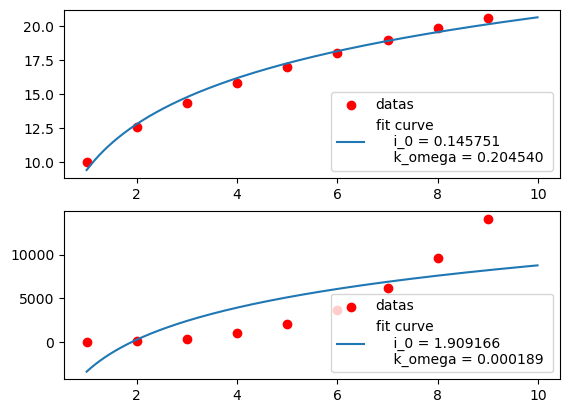

In [4]:
## Exercise 4 for homework 1
# Generate the simulated values by Steven's law
I_s = np.arange(1, 10, 1)
Ns = np.max(I_s)
a0 = 0.33
I_p = 10 * np.power(I_s, a0)

fig, ax = plt.subplots(2, 1)
ax[0].scatter(I_s, I_p, facecolor='r')


def fechners_law(i_s, k_omega, i_0):
    i_p = 1 / k_omega * np.log(i_s / i_0)
    return i_p


# def shell_fechners_law(param):
#     logs = 0
#     for i in range(np.size(I_s)):
#         logs += np.power(I_p[i - 1] - fechners_law(param, I_s[i - 1]), 2)
    # return np.sqrt(logs)


[popt, pcov] = curve_fit(fechners_law, I_s, I_p)
x_ax1 = np.arange(1, 10, 0.01)
ax[0].plot(x_ax1, fechners_law(x_ax1, popt[0], popt[1]))
ax[0].legend(['datas', 'fit curve\n    i_0 = %f\n    k_omega = %f '%(popt[1],popt[0])])

a1 = 3.3
I_p1 = 10 * np.power(I_s, a1)

ax[1].scatter(I_s, I_p1, facecolor = 'r')

[popt1, pcov1] = curve_fit(fechners_law, I_s, I_p1, maxfev = 10000)
ax[1].plot(x_ax1, fechners_law(x_ax1, popt1[0], popt1[1]))
ax[1].legend(['datas', 'fit curve\n    i_0 = %f\n    k_omega = %f '%(popt1[1],popt1[0])])



C:\Users\Phychias\AppData\Local\Temp\ipykernel_22156\443371011.py:13: RuntimeWarning: invalid value encountered in log
  i_p = 1 / k_omega * np.log(i_s / i_0)
